In [73]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
%matplotlib ipympl

In [74]:
n_rays = 100
wavelength = 0.001
k = 2 * np.pi / wavelength
pupil_radius = 0.0

wavelengths = np.full(n_rays, wavelength)

object_plane = 0.0
lens_plane = 0.3
image_plane = 1.0
focal_length = 0.2

size = 256
det_shape = (size, size)
pixel_size = 0.5 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

theta_x = 0
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

wo = wavelength * 10

wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths

coeffs = [0.0, 0.0, , 0, 0]

z = lens_plane
z1 = lens_plane
z2 = image_plane - lens_plane


In [75]:
components = (
    comp.PointBeam(
        z=object_plane,
        voltage=calculate_phi_0(wavelength),
        semi_angle = 0.1,
        xy_offset=(0.2, 0.0),
    ),
    # comp.ParallelBeam(
    #     xy_offset=(0.0, 0),
    #     z=object_plane,
    #     voltage=calculate_phi_0(wavelength),
    #     radius = 0.1
    # ),
    comp.AberratedLens(
        z = lens_plane,
        z1 = object_plane - lens_plane,
        z2 = image_plane - lens_plane,
        f = focal_length,
        name='Aberrated Lens',
        coeffs=coeffs
    ),
    comp.AccumulatingDetector(
        z=image_plane,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='ray',
    ),
)


In [76]:
model = Model(components)
all_rays_aber_lens = tuple(model.run_iter(num_rays=n_rays))

#Insert the rays to the left of the lens into the tuple of all rays
all_rays_aber_lens = all_rays_aber_lens[:1] + (model.run_to_z(num_rays=n_rays, z=lens_plane),) + all_rays_aber_lens[1:]
xvals = np.stack(tuple(r.x for r in all_rays_aber_lens), axis=0)
zvals = np.asarray(tuple(r.z for r in all_rays_aber_lens))


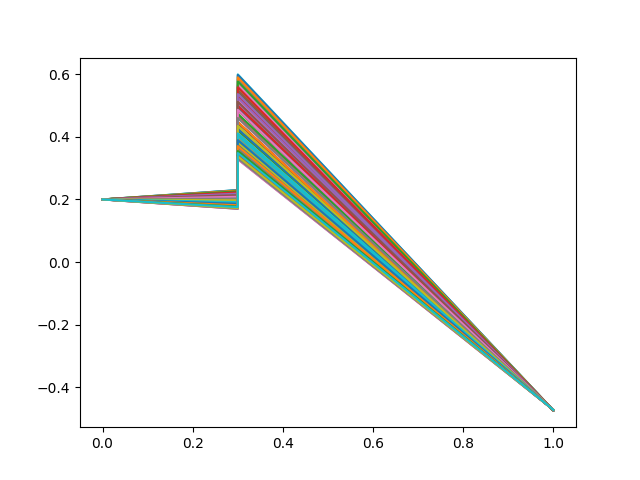

In [77]:
plt.figure()
plt.plot(zvals, xvals)

(-0.473189620088072,
 -0.4713437132452616,
 -0.0009200062357094625,
 0.0009238098207480878)

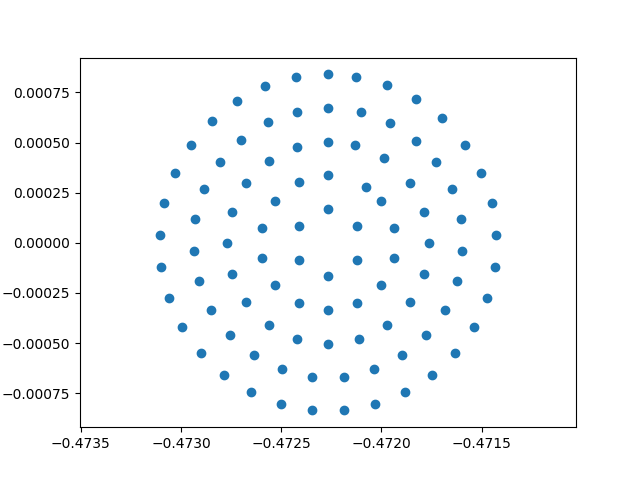

In [78]:
plt.figure()
plt.plot(all_rays_aber_lens[-1].x, all_rays_aber_lens[-1].y, 'o')
plt.axis('equal')